In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
data=pd.read_csv("whisky.csv")
valores=data.iloc[:, 2:-3]

FileNotFoundError: [Errno 2] No such file or directory: 'whisky.csv'

In [ ]:
clusterer=KMeans(n_clusters=5)
clusterer=clusterer.fit(valores)
clustersKmeans=clusterer.predict(valores)
data.loc[np.where(clustersKmeans==clustersKmeans[77])].iloc[:, 1]

3        Ardbeg
21     Caol Ila
23    Clynelish
57    Lagavulin
58     Laphroig
77     Talisker
Name: Distillery, dtype: object

In [ ]:
linkage=AgglomerativeClustering(n_clusters=5, linkage="complete")
clustersLinkage= linkage.fit_predict(valores)
data.loc[np.where(clustersLinkage==clustersLinkage[77])].iloc[:, 1]

3        Ardbeg
21     Caol Ila
23    Clynelish
57    Lagavulin
58     Laphroig
77     Talisker
Name: Distillery, dtype: object

In [ ]:
dbs=DBSCAN(eps=2.1, min_samples=2)
clustersDBS= dbs.fit_predict(valores)
data.loc[np.where(clustersDBS==clustersDBS[77])].iloc[:, 1]

1               Aberlour
3                 Ardbeg
5            ArranIsleOf
10             Balmenach
12              BenNevis
19         Bruichladdich
21              Caol Ila
23             Clynelish
24         Craigallechie
31              Edradour
32    GlenDeveronMacduff
34           GlenGarioch
40              GlenSpey
44           Glenfarclas
59              Linkwood
61              Longmorn
64            Miltonduff
65              Mortlach
68           OldPulteney
69          RoyalBrackla
72              Speyburn
74            Springbank
75            Strathisla
77              Talisker
80             Teaninich
82               Tomatin
84               Tormore
85          Tullibardine
Name: Distillery, dtype: object

In [ ]:
clusterer=KMeans(n_clusters=5)
clusterer=clusterer.fit(valores)
clustersKmeans=clusterer.predict(valores)
data.loc[np.where(clustersKmeans==clustersKmeans[77])].iloc[:, 1]

3        Ardbeg
21     Caol Ila
23    Clynelish
57    Lagavulin
58     Laphroig
77     Talisker
Name: Distillery, dtype: object

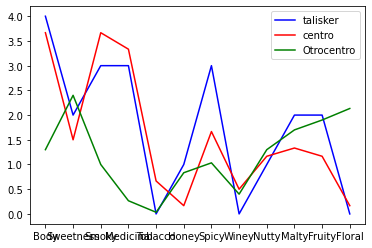

In [ ]:
#importar nuestra herramienta de visualizacion
import matplotlib.pyplot as plt
clusterer.cluster_centers_[clustersKmeans[77]]
plt.plot(valores.loc[77], color="blue", label="talisker")
plt.plot(clusterer.cluster_centers_[clustersKmeans[77]], color="red", label="centro")
#plt.plot(valores.loc[58], color="green", label="laphroig")
plt.plot(clusterer.cluster_centers_[0], color="green", label="Otrocentro")
plt.legend()

In [ ]:
from sklearn.metrics import silhouette_score
#compara k-means de 2 a 10
for i in range(2, 11):
    #crear un clusterer de kmeans
    clusterer=KMeans(n_clusters=i)
    #ajustar datos
    clusterer=clusterer.fit(valores)
    #obtener los clusters 
    clusters=clusterer.predict(valores)
    #evaluarlos
    print("Kmeans ",i,"clusters: ", silhouette_score(valores, clusters))
#comparar jerarquico (complete) de 2 a 10
for i in range(2, 11):
    #crear un clusterer de kmeans
    clusterer=AgglomerativeClustering(n_clusters=i, linkage="complete")
    #ajustar datos
    clusters=clusterer.fit_predict(valores)
    #obtener los clusters 
    #evaluarlos
    print("Complete linkage ",i,"clusters: ", silhouette_score(valores, clusters))
#comparar dbscan
clusterer=DBSCAN(eps=2.1, min_samples=2)
clusters=clusterer.fit_predict(valores)
print("DBSCAN: ", silhouette_score(valores, clusters))

Kmeans  2 clusters:  0.2934861103669283
Kmeans  3 clusters:  0.15997539858742113
Kmeans  4 clusters:  0.16242030959536233
Kmeans  5 clusters:  0.12772543025797653
Kmeans  6 clusters:  0.1255428596898158
Kmeans  7 clusters:  0.10953821192824295
Kmeans  8 clusters:  0.11358011989400951
Kmeans  9 clusters:  0.12196958227774732
Kmeans  10 clusters:  0.11431675002393459
Complete linkage  2 clusters:  0.3836194524864004
Complete linkage  3 clusters:  0.11971992818260484
Complete linkage  4 clusters:  0.09873855528124839
Complete linkage  5 clusters:  0.10178483661639647
Complete linkage  6 clusters:  0.11485974176358847
Complete linkage  7 clusters:  0.1130685829602232
Complete linkage  8 clusters:  0.10553559595464128
Complete linkage  9 clusters:  0.10833097248915229
Complete linkage  10 clusters:  0.11053501192260948
DBSCAN:  -0.015297466711850642


In [ ]:
clusterer=KMeans(n_clusters=2)
clusterer=clusterer.fit(valores)
clustersKmeans=clusterer.predict(valores)
data.loc[np.where(clustersKmeans==clustersKmeans[77])].iloc[:, 1]
#plt.plot(valores.loc[77], color="blue", label="talisker")
#plt.plot(clusterer.cluster_centers_[clustersKmeans[77]], color="red", label="centro")

3           Ardbeg
21        Caol Ila
23       Clynelish
39      GlenScotia
55    Isle of Jura
57       Lagavulin
58        Laphroig
66            Oban
68     OldPulteney
74      Springbank
77        Talisker
Name: Distillery, dtype: object

In [ ]:
#importar nuestro c-means
from skfuzzy.cluster import cmeans
#crear un agrupador y pasarle losdatos a clusterizar
valoresCmeans=cmeans(valores.T, c=5, m=1.05, error=10-6,maxiter=1000)
valoresCmeans[1][:, 77]


array([1.01368104e-10, 1.99518132e-11, 8.44857646e-11, 1.00000000e+00,
       1.32793691e-12])

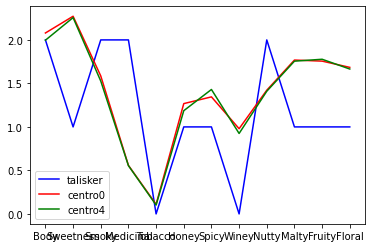

In [ ]:
plt.plot(valores.loc[55], color="blue", label="talisker")
plt.plot(valoresCmeans[0][0], color="red", label="centro0")
plt.plot(valoresCmeans[0][4], color="green", label="centro4")
#plt.plot(valores.loc[58], color="green", label="laphroig")

plt.legend()